In [160]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Load Data liver

In [161]:
data = pd.read_csv('liverV1.csv', header= 0, encoding= 'unicode_escape')
data.head()

,age,gender,total bilirubin,direct bilirubin,alkaline phosphotase,alamine aminotransferase,aspartate aminotransferase,total protiens,albumin,albumin and globulin ratio,result
0,65,Female,2.7,2.1,187,16,18,6.8,3.3,2.90,1
1,62,Male,12.9,5.5,699,64,122,7.5,3.2,2.74,1
2,62,Male,7.3,4.1,492,62,68,7.0,3.3,2.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [162]:
data.to_csv("liverV1.csv")
data.shape

(2898, 11)

# Data Pre-Processing
## Fill Missing Value

In [163]:
data.isnull().any()

age                           False
gender                        False
total bilirubin               False
direct bilirubin              False
alkaline phosphotase          False
alamine aminotransferase      False
aspartate aminotransferase    False
total protiens                False
albumin                       False
albumin and globulin ratio    False
result                        False
dtype: bool

In [164]:
data.fillna(data.mean(), inplace = True)

C:\Users\Bahar Andili\AppData\Local\Temp\ipykernel_13780\2513612827.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace = True)


In [165]:
data.isnull().any()

age                           False
gender                        False
total bilirubin               False
direct bilirubin              False
alkaline phosphotase          False
alamine aminotransferase      False
aspartate aminotransferase    False
total protiens                False
albumin                       False
albumin and globulin ratio    False
result                        False
dtype: bool

# Plot Perbandingan Data Desease dan Healthy

With Desease :
    total bilirubin  direct bilirubin  alkaline phosphotase  \
0              2.7               2.1                   187   
1             12.9               5.5                   699   

   alamine aminotransferase  aspartate aminotransferase  total protiens  \
0                        16                          18             6.8   
1                        64                         122             7.5   

   albumin  albumin and globulin ratio  
0      3.3                        2.90  
1      3.2                        2.74  
Without Desease :
     total bilirubin  direct bilirubin  alkaline phosphotase  \
11              0.9               0.2                   194   
15              1.1               0.5                   128   

    alamine aminotransferase  aspartate aminotransferase  total protiens  \
11                        52                          45             6.0   
15                        20                          30             3.9   

    albumi

,Chemicals,Mean_Values,Status
0,total bilirubin,4.182709,Desease
1,direct bilirubin,1.904899,Desease
2,alkaline phosphotase,317.832853,Desease
3,alamine aminotransferase,88.293948,Desease
4,aspartate aminotransferase,116.475504,Desease
5,total protiens,6.456196,Desease
6,albumin,3.064265,Desease
7,albumin and globulin ratio,0.936081,Desease
8,total bilirubin,1.074265,Healthy
9,direct bilirubin,0.361765,Healthy


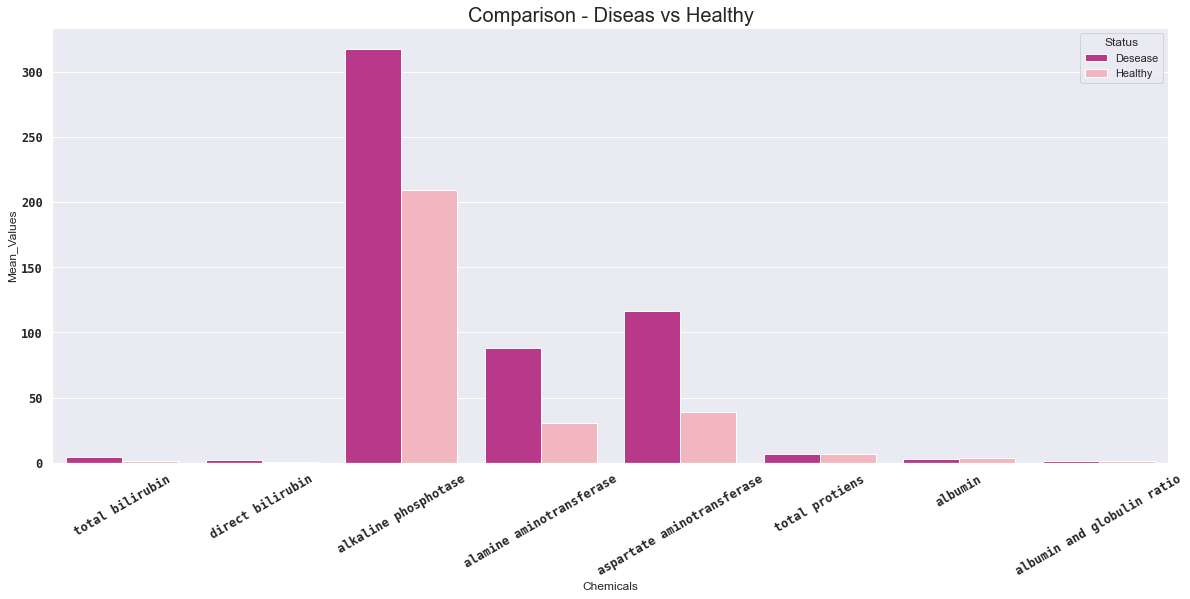

In [166]:
with_desease = data[data['result']==1]
with_desease = with_desease.drop(columns=['gender','age','result'])
names1 = with_desease.columns.unique()
mean_of_feature = with_desease.mean(axis=0, skipna=True)


without_desease = data[data['result']==0]
without_desease = without_desease.drop(columns=['gender','age','result'])
names2 = without_desease.columns.unique()
mean_of_feature2 = without_desease.mean(axis=0, skipna=True)


print("With Desease :\n", with_desease.head(2))
print("Without Desease :\n", without_desease.head(2))


people =[]

for x, y in zip(names1, mean_of_feature):
    people.append([x,y,'Desease'])

for x, y in zip(names2, mean_of_feature2):
    people.append([x,y,'Healthy'])
    
    
    #
new_data = pd.DataFrame(people, columns=['Chemicals','Mean_Values','Status'])


fig = plt.figure(figsize=(20, 8))
plt.title("Comparison - Diseas vs Healthy", size = 20, loc='center')
plt.xticks(
    rotation = 30,
    weight = 'bold',
    family= 'monospace',
    size ='large'
        
)
plt.yticks(
    weight='bold',
    family = 'monospace',
    size = 'large'
)

g1 = sns.barplot(
    x = 'Chemicals', 
    y='Mean_Values', 
    hue='Status', 
    data= new_data, 
    palette="RdPu_r"
)
new_data

# Plot Perbandingan Total Male Female dan Desease dan Healthy

[None, None, None, None]

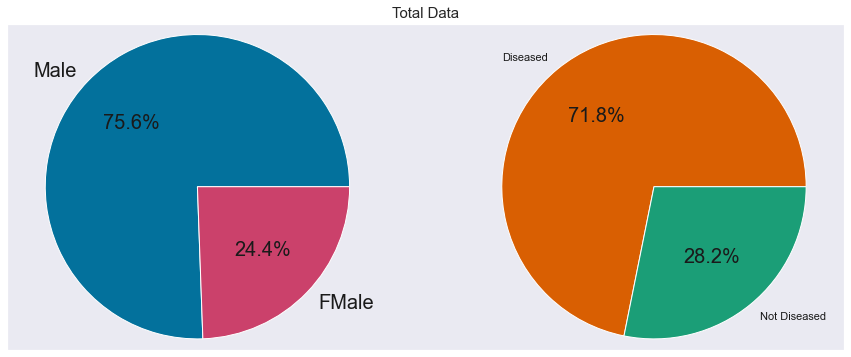

In [167]:
fig = plt.figure(figsize=(15, 6), frameon=False)
plt.title("Total Data", loc='center', weight=10, size=15)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


only_geder = data["gender"]

male_tot = only_geder[only_geder=='Male']

no_of_male = len(male_tot)
no_of_fmale = len(data)-len(male_tot)

m_vs_f = [no_of_male, no_of_fmale]

with_disease = data[data['result']==1]
not_with_disease = data[data['result']==0]

#with_desease =  with_desease["Gender"]

no_of_disease = len(with_desease)
no_of_not_disease = len(data)-len(with_desease)

d_vs_healty = [no_of_disease, no_of_not_disease]

ax1.axis('equal')
ax2.axis('equal')

wedges, texts, autotext = ax1.pie(
    m_vs_f,
    labels = ('Male','FMale'),
    radius=1,
    textprops = dict(color='k'),
    colors=['xkcd:ocean blue','xkcd:dark pink'],
    autopct = "%1.1f%%"
)
wedges2, texts2, autotext2 =ax2.pie(
    d_vs_healty,
    labels=('Diseased','Not Diseased'),
    radius = 1,
    textprops=dict(color='k'),
    colors = ["#d95f02","#1b9e77"],
    autopct = "%1.1f%%"
)

plt.setp(autotext, size=20)
plt.setp(texts, size=20)

plt.setp(autotext2, size=20)
plt.setp(autotext2, size=20)

## Menghitung Korelasi Menggunakan Pearson

In [168]:
pearsoncorr = data.corr(method='pearson')

<AxesSubplot:>

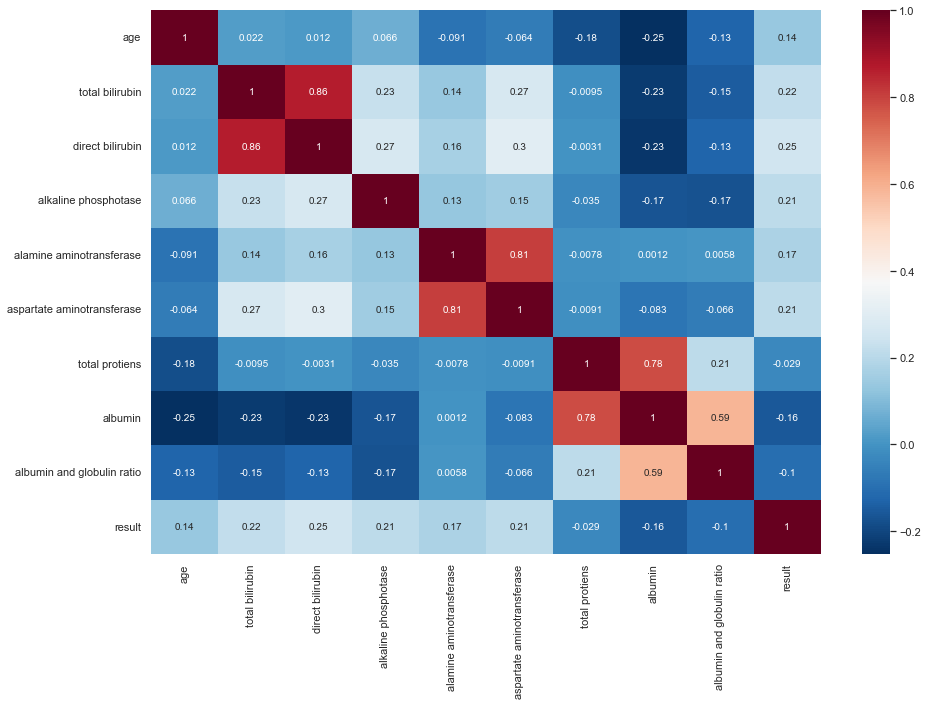

In [169]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True)

## Label encoder

In [170]:
le = LabelEncoder()
data.gender = le.fit_transform(data.gender)
data.head()

,age,gender,total bilirubin,direct bilirubin,alkaline phosphotase,alamine aminotransferase,aspartate aminotransferase,total protiens,albumin,albumin and globulin ratio,result
0,65,0,2.7,2.1,187,16,18,6.8,3.3,2.90,1
1,62,1,12.9,5.5,699,64,122,7.5,3.2,2.74,1
2,62,1,7.3,4.1,492,62,68,7.0,3.3,2.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Split Data train dan data test

In [171]:
# Scale features
#sc1 = MinMaxScaler()
#X = sc1.fit_transform(data[['Ages','Gender','TB','DB','AAP','SGPT','SGOT','TP','ALB','A/G']])

# Scale predicted value
#sc2 = MinMaxScaler()
#y = sc2.fit_transform(data[['Diagnosis']])

X = data.iloc[:,:-1].values
y = data.iloc[:,-1]
#for u in range(len(y)):
    #if y[u] == 2:
       #y[u] = 0

In [172]:
X

array([[65.  ,  0.  ,  2.7 , ...,  6.8 ,  3.3 ,  2.9 ],
       [62.  ,  1.  , 12.9 , ...,  7.5 ,  3.2 ,  2.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  2.89],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [173]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2893    0
2894    1
2895    1
2896    1
2897    0
Name: result, Length: 2898, dtype: int64

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

In [175]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.14135858419579905

## Skalakan Data

In [176]:
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:]) 
X_test[:,2:] = sc.fit_transform(X_test[:,2:]) 
print("\n-------------------------------------------------------------------------\n")
print("hasil transformasi nilai X_train : \n", X_train[:,2:])
print("\n-------------------------------------------------------------------------\n")
print("hasil transformasi nilai X_test : \n", X_test[:,2:])
print("\n-------------------------------------------------------------------------\n")


-------------------------------------------------------------------------

hasil transformasi nilai X_train : 
 [[-0.37384111 -0.45945671  0.24503242 ...  1.41393508  1.07530105
   0.10065818]
 [-0.25245877 -0.17300683 -0.45320778 ...  0.6697038   0.5719594
   0.10065818]
 [ 0.08134266  0.18505552 -0.3908649  ...  0.76273271 -0.93806554
  -1.52417231]
 ...
 [-0.41935948 -0.45945671 -0.78570311 ... -1.37693221  0.19445317
   2.53790391]
 [ 0.23307058  0.43569917 -0.41164586 ...  0.57667489 -0.30888848
  -0.71175707]
 [-0.3890139  -0.45945671  0.08294095 ...  0.29758816  1.20113646
   1.48176409]]

-------------------------------------------------------------------------

hasil transformasi nilai X_test : 
 [[-0.03426083 -0.04374695 -0.32198325 ... -3.01123495 -2.03274293
   0.14494444]
 [-0.41096762 -0.44707869 -0.4043746  ...  0.643475    1.69588104
   2.0245085 ]
 [ 0.7944941   0.98291565  1.08896857 ...  0.46944119  0.20443145
   5.52733244]
 ...
 [-0.37329694 -0.41041217 -0.4661681

# Pemodelan dan Prediksi
## KNN Classifier

In [177]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))
print("------------------------------------------------------")
print("The accuracy KNN: \n = ", accuracy_knn)
print("------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       156
           1       0.98      0.98      0.98       424

    accuracy                           0.97       580
   macro avg       0.96      0.96      0.96       580
weighted avg       0.97      0.97      0.97       580

------------------------------------------------------
The accuracy KNN: 
 =  0.9689655172413794
------------------------------------------------------


## Random Forest

In [178]:
rf = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=0)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(rf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

print("------------------------------------------------------")
print("The accuracy Random Forest: \n =", accuracy_rf)
print("------------------------------------------------------")

RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       156
           1       0.99      0.99      0.99       424

    accuracy                           0.99       580
   macro avg       0.99      0.99      0.99       580
weighted avg       0.99      0.99      0.99       580

------------------------------------------------------
The accuracy Random Forest: 
 = 0.9896551724137931
------------------------------------------------------


# Plot Perbandingan Akurasi

In [179]:
model_comparations =[['KNN', accuracy_knn*100],
                    ['Random Forest', accuracy_rf*100]]
                    

model_comparations_df = pd.DataFrame(model_comparations,
                                     columns=['Model','Accuracy']
                                    )

model_comparations_df

,Model,Accuracy
0,KNN,96.896552
1,Random Forest,98.965517


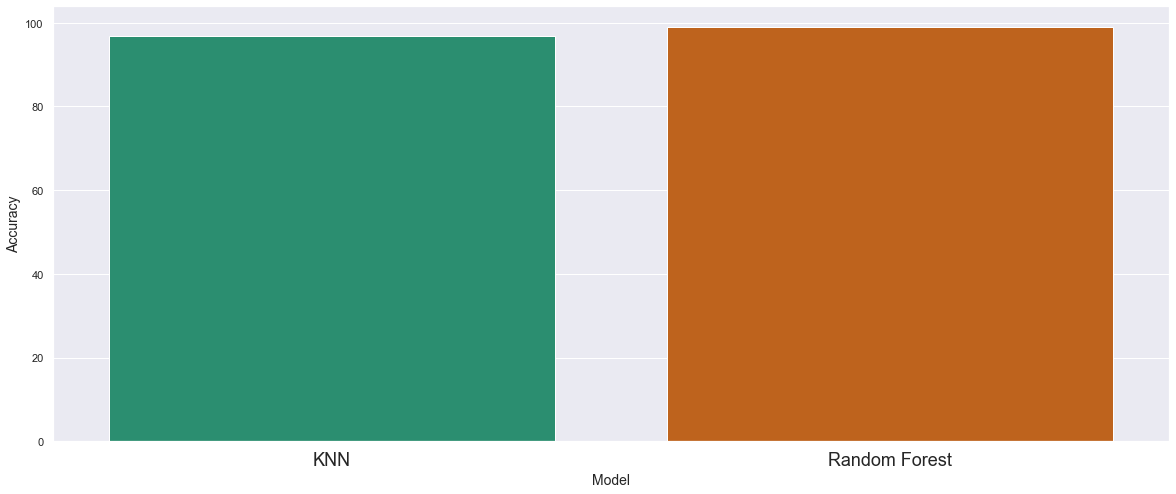

In [180]:
fig = plt.figure(figsize=(20,8))
sns.set()
sns.barplot(x='Model',
            y='Accuracy', 
            data=model_comparations_df,
            palette='Dark2'
           )

plt.xticks(size=18)
plt.ylabel('Accuracy', size=14)
plt.xlabel('Model', size=14)
plt.show()

# K fold Cross Val

In [181]:
sc1 = cross_val_score (classifier_knn, X_train, y_train, cv = 5)
print(sc1)
print(sc1.mean())
print("AUC: %0.2f (+/- %0.2f)" % (sc1.mean(), sc1.std() * 2))

[0.96336207 0.95043103 0.88577586 0.92224622 0.94600432]
0.9335639010948089
AUC: 0.93 (+/- 0.05)


In [182]:
sc3 = cross_val_score (rf, X_train, y_train, cv = 5)
print(sc3)
print(sc3.mean())
print("AUC: %0.2f (+/- %0.2f)" % (sc3.mean(), sc3.std() * 2))

[0.99568966 1.         1.         1.         1.        ]
0.9991379310344828
AUC: 1.00 (+/- 0.00)


## Confusion Matrix

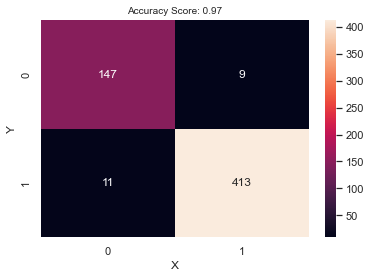

[[147   9]
 [ 11 413]]


In [183]:
def plot_confusion_matrix(y_pred_rf, y_pred_knn):
    acc = round(accuracy_score(y_pred_rf, y_pred_knn), 2)
    cm = confusion_matrix(y_pred_rf, y_pred_knn)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_pred_rf, y_pred_knn)
print(confusion_matrix(y_pred_rf, y_pred_knn))

In [184]:
TP = 147
TN = 9
FP = 11
FN = 413

In [185]:
accuracy= (TN+TP)/(TN+TP+FN+FP)
accuracy

0.2689655172413793

In [186]:
precision= TP/(TP+FP)
precision

0.930379746835443

In [187]:
recall= TP/(TP+FN)
recall

0.2625

In [188]:
f1meas= (2*precision*recall)/(precision+recall)
f1meas

0.40947075208913647